# Week 07 Handson - Association Rule
In this hands-on session, we will try to uncover the association rule from given transaction items. Association rule mining is a technique to identify underlying relations between different items. We will cover:
1. data preprocessing for association rule,
2. implement algorithm for association rule,
3. find interesting association rule from dataset

## Read dataset "dataset_association_rule.dat"

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset_association_rule.dat', header=None)
df

,0
0,36 69 115 226 278 343 345 358 368 370 401 450 ...
1,8 51 55 73 78 117 140 175 187 229 266 295 304 ...
2,53 55 98 159 192 322 332 402 412 413 424 430 4...
3,48 203 205 227 279 294 320 335 359 414 509 525...
4,58 69 73 82 120 146 166 178 217 220 244 256 33...
...,...
99995,33 40 48 69 82 140 161 197 216 259 285 354 419...
99996,41 93 94 98 110 111 112 144 155 158 161 213 21...
99997,19 73 78 95 154 157 181 186 276 277 278 295 36...
99998,54 70 74 115 151 161 173 177 181 186 275 298 3...


## Milestone 01 (M01)
Based on the dataset given to you, perform data pre-processing so that the data become ready to be fed to the algorithm (you may use any library providing you an assocation rule API). Save the result of pre-processed data in a variable called 'item_belanja'.<br>

In [5]:
#put your code here for M01
item_belanja = [sentence.split() for sentence in df[df.columns[0]]]

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(item_belanja).transform(item_belanja)
df = pd.DataFrame(te_ary, columns=te.columns_)
n_transactions = df.shape[0]
df

,0,1,10,100,101,102,103,104,105,106,...,989,990,991,992,993,994,995,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
percentage_items = {}
for col in df:
    percentage_items[col] = float(np.count_nonzero(df[col]) / n_transactions)

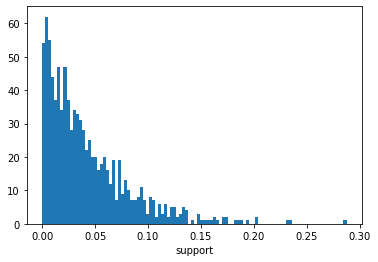

In [56]:
import matplotlib.pyplot as plt

plt.hist(percentage_items.values(), bins=100)
plt.xlabel("support")
plt.show()

In [76]:
tmp = np.fromiter(percentage_items.values(), dtype=float)
min_support = np.quantile(tmp,  0.7)  #Support threshold = 70%
min_support

0.05194099999999999

Print the pre-processing result (you may print only some parts of the data) :

In [34]:
item_belanja[0]

['36',
 '69',
 '115',
 '226',
 '278',
 '343',
 '345',
 '358',
 '368',
 '370',
 '401',
 '450',
 '489',
 '494',
 '573',
 '577',
 '581',
 '583',
 '610',
 '682',
 '692',
 '705',
 '722',
 '832',
 '862',
 '886',
 '908',
 '923',
 '932',
 '960',
 '977']

## M02
In this step, you will generate association rules from your ready-to-go-dataset.<br><br>
a. Again, choose the library you will use for generating association rules, mention what the algorithm is, and explain the reason/s why you choose it<br>
b. Using the library that you've chosen in (M02.a), generate association rules from the pre-processed dataset in M01.<br>
c. Print the association rule that you've found in M02.b along with their support and confidence scores.<br>
d. What is/are your conclusion/s from the association rules you obtain?

Your answer (M02.a):

Di program ini memakai algoritma FPGrowth. Berbeda dengan cost tinggi oleh algoritma Apriori yang mengharuskan menghitung candidate itemsets setiap generasi dan melakukan scans berulang terhadap dataset per generasi, algoritma FPGrowth tidak melalui tahap tersebut. Algoritma FPGrowth merepresentasi dataset dalam bentuk tree yang disebut dengan Frequent Pattern Growth atau FP tree. Setiap simpul pohon ini merepresentasikan itemsets. FPGrowth menerapkan strategi divide&conquer. FPGrowth hanya perlu melakukan scan database dua kali saja, berbeda dengan Apriori yang jumlah iterasi tergantung oleh min_support dan jumlah candidate itemsets.

<br>

Namun FPGrowth memiliki kekurangan juga, ketika dataset berjumlah banyak, pohon yang dibentuk terancam tidak akan muat di memory

In [77]:
#put your code here for M02.b
from mlxtend.frequent_patterns import fpgrowth

fpgrowth_data = fpgrowth(df, min_support=min_support, use_colnames=True)
fpgrowth_data

,support,itemsets
0,0.28738,(368)
1,0.18921,(489)
2,0.17427,(682)
3,0.17203,(692)
4,0.16203,(722)
...,...,...
290,0.05569,"(368, 419)"
291,0.05560,"(368, 914)"
292,0.05638,"(529, 829)"
293,0.06957,"(368, 829)"


In [87]:
#put your code here for M02.c

from mlxtend.frequent_patterns import association_rules

rules = association_rules(fpgrowth_data, metric="confidence", min_threshold=0.1) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(368),(489),0.28738,0.18921,0.06120,0.212958,1.125514,0.006825,1.030174
1,(489),(368),0.18921,0.28738,0.06120,0.323450,1.125514,0.006825,1.053315
2,(368),(682),0.28738,0.17427,0.06130,0.213306,1.224000,0.011218,1.049621
3,(682),(368),0.17427,0.28738,0.06130,0.351753,1.224000,0.011218,1.099303
4,(368),(692),0.28738,0.17203,0.05867,0.204155,1.186739,0.009232,1.040366
5,(692),(368),0.17203,0.28738,0.05867,0.341045,1.186739,0.009232,1.081440
6,(692),(529),0.17203,0.23384,0.05409,0.314422,1.344603,0.013863,1.117539
7,(529),(692),0.23384,0.17203,0.05409,0.231312,1.344603,0.013863,1.077121
8,(368),(529),0.28738,0.23384,0.07500,0.260978,1.116056,0.007799,1.036722
9,(529),(368),0.23384,0.28738,0.07500,0.320732,1.116056,0.007799,1.049100


In [83]:
rules[(rules['lift'] == 1 )]  #check if there is any independence inference

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Your conclusion (M02.d):

- nilai min_support yang semakin rendah, pohon FPGrowth semakin kompleks sehingga waktu komputasi semakin tinggi pula
- Semakin tinggi nilai beragam jenis itemsets dibagi dengan jumlah transactions atau dataset, semakin rendah pula nilai support single itemsets.
- Tidak ada rules yang bersifat independence dengan min_support = quantile 70% dari nilai support single itemset. Ditunjukkan dari nilai lift yang mengandung nilai bukan 1
- Nilai conviction cenderung rendah. Nilai conviction umumnya berkisar 0 - ~. Nilai ini rendah menunjukan tidak terlalu bergantung pada antecedent
- Nilai leverage juga rendah. Nilai yang rendah menujukkan antecedents dan consequents mendekati hubungan independent